In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/spam.csv',encoding='Latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#
Data Cleaning

In [ ]:
df=data.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df=df.rename(columns={'v1':'Target','v2':'Text'}.get)

In [ ]:
df['Target']=df['Target'].apply({'ham':0,'spam':1}.get)

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

#EDA

In [ ]:
import matplotlib.pyplot as plt


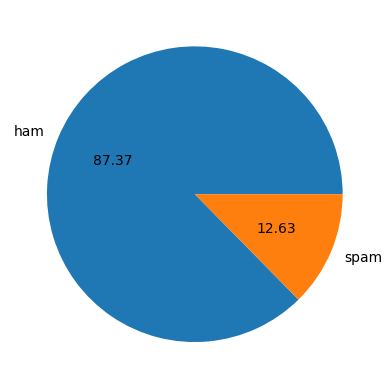

In [ ]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
! pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [ ]:
df['num_char']=df['Text'].apply(len)

In [ ]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as snr

<Axes: xlabel='num_char', ylabel='Count'>

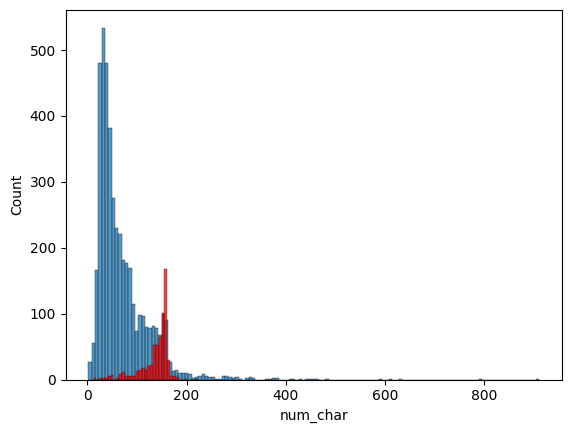

In [ ]:
snr.histplot(df[df['Target']==0]['num_char'])
snr.histplot(df[df['Target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

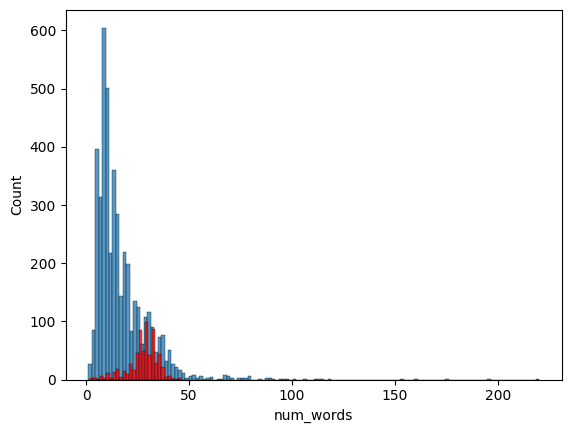

In [ ]:
snr.histplot(df[df['Target']==0]['num_words'])
snr.histplot(df[df['Target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

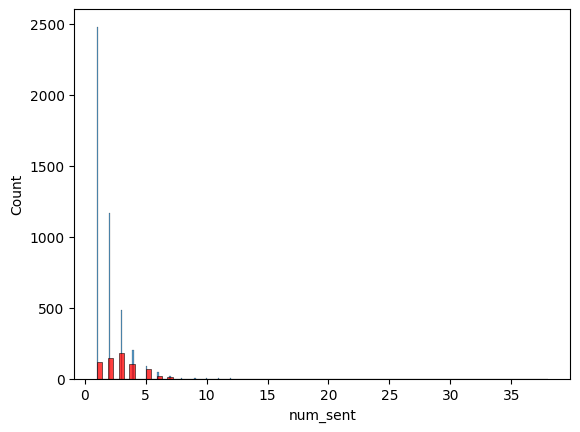

In [ ]:
snr.histplot(df[df['Target']==0]['num_sent'])
snr.histplot(df[df['Target']==1]['num_sent'],color='red')

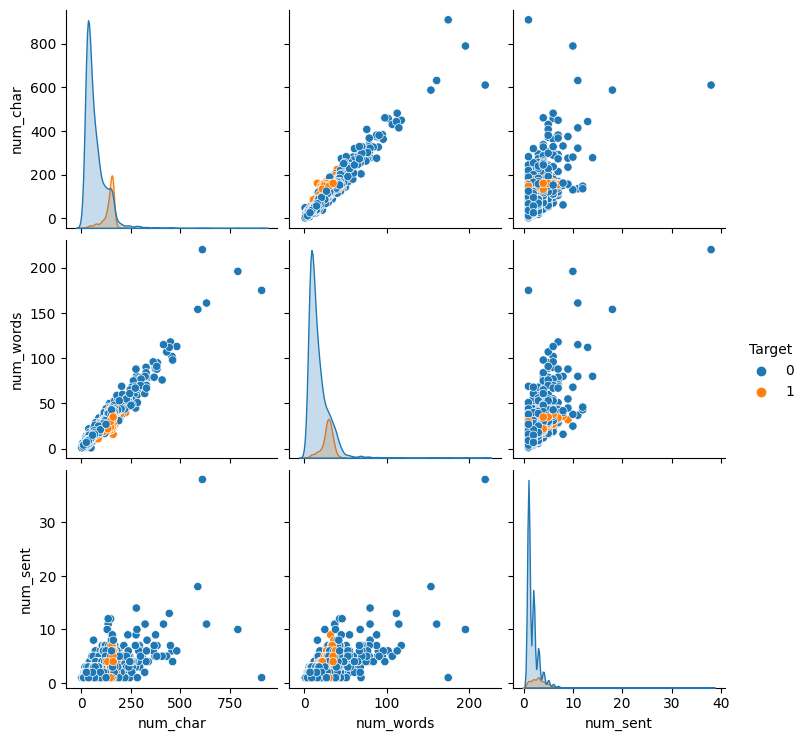

In [ ]:
snr.pairplot(df,hue='Target')

<ipython-input-77-55c083023ff0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  snr.heatmap(df.corr(),annot=True)


<Axes: >

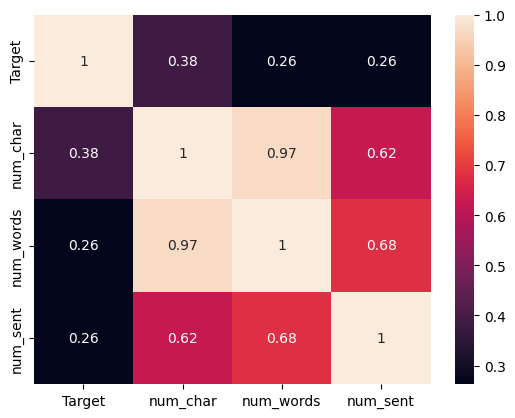

In [ ]:
snr.heatmap(df.corr(),annot=True)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#
Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def text_transformation(text):
  text = text.lower()
  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
text_transformation('Requirement already satisfied: nltk in /usr/local/lib/python3.10/dist-packages (3.8.1)')

'requir alreadi satisfi nltk'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
ps.stem('dancing')

'danc'

In [ ]:
df['text_transformation']=df['Text'].apply(text_transformation)

In [ ]:
df.head()

,Target,Text,num_char,num_words,num_sent,text_transformation
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=400, background_color='white')


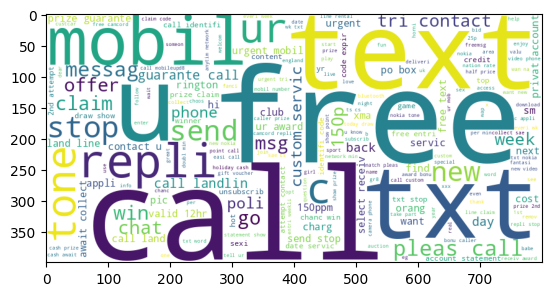

In [ ]:
sp=wc.generate(df[df['Target']==1]['text_transformation'].str.cat(sep=" "))
plt.imshow(sp)

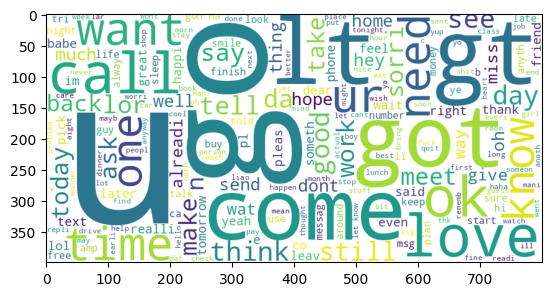

In [ ]:
sp=wc.generate(df[df['Target']==0]['text_transformation'].str.cat(sep=" "))
plt.imshow(sp)

In [ ]:
spam_corpus=[]
for msg in df[df['Target']==1]['text_transformation'].tolist():
  for word in msg .split():
    spam_corpus.append(word)


In [ ]:
ham_corpus=[]
for msg in df[df['Target']==0]['text_transformation'].tolist():
  for word in msg .split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


#model building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf=TfidfVectorizer()

In [ ]:
x=tf.fit_transform(df['text_transformation']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y=df['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [ ]:
gnb.fit(x_train,y_train)
pre=gnb.predict(x_test)
ac=accuracy_score(y_test,pre)
cm=confusion_matrix(y_test,pre)
p=precision_score(y_test,pre)

In [ ]:
mnb.fit(x_train,y_train)
pre=mnb.predict(x_test)
ac1=accuracy_score(y_test,pre)
cm1=confusion_matrix(y_test,pre)
p1=precision_score(y_test,pre)

In [ ]:
bnb.fit(x_train,y_train)
pre=bnb.predict(x_test)
ac2=accuracy_score(y_test,pre)
cm2=confusion_matrix(y_test,pre)
p2=precision_score(y_test,pre)

In [ ]:
cm

array([[754, 137],
       [ 22, 121]])

In [ ]:
ac

0.8462282398452611

In [ ]:
ac1

0.9555125725338491

In [ ]:
cm1

array([[891,   0],
       [ 46,  97]])

In [ ]:
ac2

0.9642166344294004

In [ ]:
cm2

array([[889,   2],
       [ 35, 108]])

In [ ]:
p

0.4689922480620155

In [ ]:
p1

1.0

In [ ]:
p2

0.9818181818181818

In [ ]:
import pickle

In [ ]:
pickle.dump(tf,open('w2v.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# from all the steps we have undestand the main diffrance of spam and ham mail

spam mail have more num_ words than ham mail/ massage

ham mail have less num_words than spam mail/ massage